# Import necessary library

In [71]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

# Import dataset from keras dataset

In [5]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

# Explor data analysis

In [37]:
x_train.shape
y_train.shape
x_test.shape
y_test.shape

(60000, 28, 28)

In [43]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [36]:
y_train[3]

1

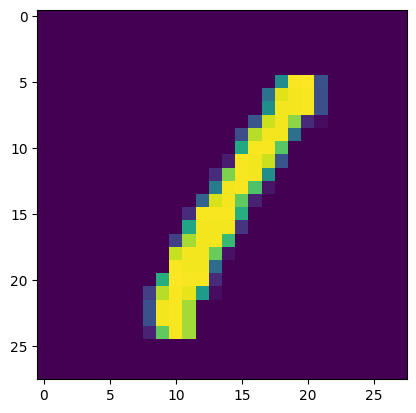

In [35]:
plt.imshow(x_train[3])

# Normilaze datases 

In [74]:
x_train = x_train/255
x_test  = x_test/255

In [76]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Model Bulid

In [88]:
# Define the model
model = Sequential([
    #cnn
    Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Flatten(),  # Flatten the 2D image into 1D
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(10, activation="softmax")  # Softmax for multi-class classification
])

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [89]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",  
    metrics=["accuracy"]
)

In [90]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 0.8763 - loss: 0.3811
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9833 - loss: 0.0547
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9907 - loss: 0.0311
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9927 - loss: 0.0232
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9947 - loss: 0.0182


# Model Prdection

In [91]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [92]:
y_pred

array([[4.4126261e-12, 1.6006023e-09, 2.3103176e-08, ..., 1.0000000e+00,
        2.4535313e-10, 3.9098335e-08],
       [2.7922164e-08, 4.7266909e-07, 9.9999952e-01, ..., 1.9350481e-09,
        2.7126138e-08, 5.0246637e-11],
       [3.1905838e-08, 9.9997926e-01, 7.7858175e-07, ..., 2.9106561e-06,
        1.0128156e-05, 7.9910762e-08],
       ...,
       [2.4655589e-14, 3.9101861e-10, 3.9663423e-10, ..., 2.7046040e-10,
        3.3437639e-09, 1.4405386e-07],
       [3.1113292e-10, 1.5357855e-08, 1.0678968e-10, ..., 1.4171012e-07,
        1.6246922e-02, 1.7400804e-08],
       [1.0611371e-08, 8.5065698e-11, 4.5015908e-11, ..., 8.8476291e-14,
        1.2391908e-07, 3.5471173e-13]], dtype=float32)

In [93]:
y_pred_label =[np.argmax(i) for i in y_pred]

In [94]:
y_pred_label[0]

7

In [95]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    1,    0,    0,    0,    4,    1,    3,    0],
       [   0, 1127,    0,    2,    1,    0,    3,    0,    2,    0],
       [   2,    2, 1007,    1,    1,    0,    2,   11,    5,    1],
       [   0,    0,    0, 1003,    0,    1,    0,    3,    3,    0],
       [   0,    0,    0,    0,  975,    0,    2,    0,    2,    3],
       [   2,    0,    1,   14,    0,  837,    7,    1,   28,    2],
       [   1,    2,    0,    0,    6,    1,  945,    0,    3,    0],
       [   0,    2,    3,    0,    1,    0,    0, 1020,    0,    2],
       [   1,    0,    2,    2,    0,    0,    0,    3,  963,    3],
       [   0,    1,    1,    2,   10,    0,    0,    8,    5,  982]])>

Text(0.5, 1.0, 'HandWritten digit classification')

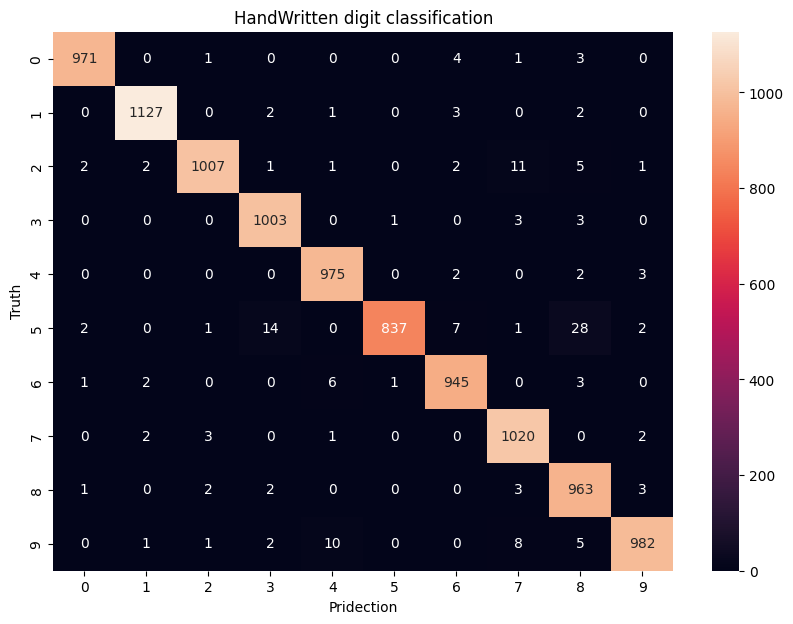

In [96]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Pridection")
plt.ylabel("Truth")
plt.title("HandWritten digit classification")